In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[: ,0] = np.random.uniform(0., 100., size = 100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10, size = 100)

In [3]:
def demean(X):
    return X - np.mean(X, axis=0)

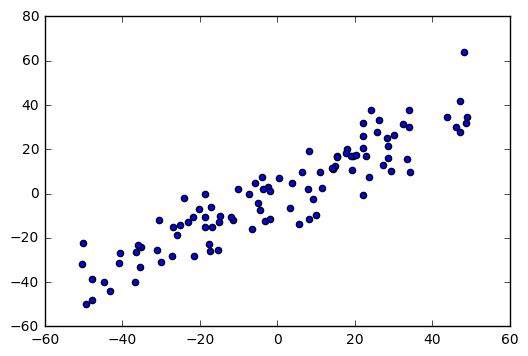

In [4]:
X_demean = demean(X)
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

In [5]:
def f(w, X):
    return np.sum(X.dot(w)**2) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X) # w = 0,求导一直为0，所以初始的时候不能为w不能为 0 向量

def direction(w):
    return w / np.linalg.norm(w) # linalg为numpy得线性代数库，np.linalg.norm(w)求解 w 向量的模。

def first_component(X, initial_w, eta, n_iter = 1e4, epsilon = 1e-8):
    w = direction(initial_w)
    while n_iter > 0:
        n_iter -= 1
        gradicent = df(w, X)
        last_w = w;
        w = w + eta * gradicent # 
        w = direction(w) ### 重置成为单位向量
        if abs(f(last_w, X) - f(w, X)) < epsilon :
            break;
    return w

In [6]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X_demean, initial_w, eta)

In [7]:
w

array([0.76700657, 0.64163925])

In [8]:
X2 = np.empty(X.shape)
X2 = X - X.dot(w).reshape(-1, 1) * w

# 1.for i in range(len(X)):
# 1.    X2[i] = X[i] - X[i].dot(w) * w
    
# 2.X2 = X - X.dot(w).reshape(-1, 1) * w

# 1. / 2. 两种不同的写法

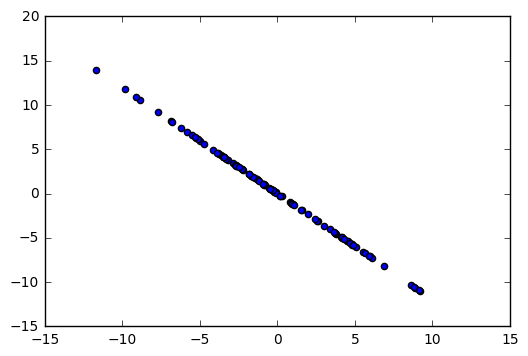

In [9]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [10]:
w2 = first_component(X2, initial_w, eta)
w2

array([-0.64163444,  0.76701059])

In [11]:
w.dot(w2) # 趋近 0 ，垂直关系

6.27704798517037e-06

In [12]:
a = np.random.random(6).reshape(2, -1)

In [13]:
a

array([[0.59048368, 0.44459009, 0.68762783],
       [0.61762865, 0.94672162, 0.18061   ]])

In [14]:
b = np.random.random(3)

In [15]:
b

array([0.20843422, 0.77242159, 0.72485724])

In [16]:
c = a.dot(b)
c

array([0.96492   , 0.99091963])

### 前n个主成分

In [19]:
def first_n_components(n, X, eta = 0.01, n_iter = 1e4, epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta, n_iter, epsilon)
        res.append(w)
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
    return res

In [20]:
first_n_components(2, X)

[array([0.76700681, 0.64163896]), array([-0.6416342 ,  0.76701079])]